# CNN Non-Pretrained

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Dropout,
    GlobalAveragePooling2D
)

from sklearn.metrics import confusion_matrix, classification_report

# PARAMETER
IMG_SIZE = (96, 96)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 5

TRAIN_DIR = "../dataset_split/train"
VAL_DIR   = "../dataset_split/val"
TEST_DIR  = "../dataset_split/test"
MODEL_DIR = "../models"

os.makedirs(MODEL_DIR, exist_ok=True)

# DATA GENERATOR
datagen = ImageDataGenerator(rescale=1./255)

print("Loading TRAIN dataset...")
train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

print("Loading VALIDATION dataset...")
val_gen = datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

print("Loading TEST dataset...")
test_gen = datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# CNN BASE MODEL
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu',
            input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(NUM_CLASSES, activation='softmax')
])

# COMPILE
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()

Loading TRAIN dataset...
Found 6941 images belonging to 5 classes.
Loading VALIDATION dataset...
Found 2117 images belonging to 5 classes.
Loading TEST dataset...
Found 2129 images belonging to 5 classes.


c:\Users\ASUS\UAP MACHINE LEARNING (ML)\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,829 (397.77 KB)

 Trainable params: 101,829 (397.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TRAINING
history = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

# SAVE MODEL
MODEL_PATH = os.path.join(MODEL_DIR, "cnn_base_96.h5")
cnn_model.save(MODEL_PATH)
print(f"✅ Model CNN Base berhasil disimpan di: {MODEL_PATH}")


Epoch 1/10
  6/217 ━━━━━━━━━━━━━━━━━━━━ 1:38 466ms/step - accuracy: 0.2315 - loss: 1.6062

c:\Users\ASUS\UAP MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


  7/217 ━━━━━━━━━━━━━━━━━━━━ 1:33 444ms/step - accuracy: 0.2303 - loss: 1.6067

c:\Users\ASUS\UAP MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


217/217 ━━━━━━━━━━━━━━━━━━━━ 141s 627ms/step - accuracy: 0.5630 - loss: 1.0173 - val_accuracy: 0.7534 - val_loss: 0.6332
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 133s 614ms/step - accuracy: 0.7791 - loss: 0.6076 - val_accuracy: 0.7813 - val_loss: 0.5653
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 132s 610ms/step - accuracy: 0.8156 - loss: 0.5200 - val_accuracy: 0.8484 - val_loss: 0.4276
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 142s 654ms/step - accuracy: 0.8368 - loss: 0.4544 - val_accuracy: 0.8673 - val_loss: 0.3833
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 62s 285ms/step - accuracy: 0.8477 - loss: 0.4255 - val_accuracy: 0.8682 - val_loss: 0.3529
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 182ms/step - accuracy: 0.8598 - loss: 0.3908 - val_accuracy: 0.8895 - val_loss: 0.2985
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 41s 186ms/step - accuracy: 0.8712 - loss: 0.3587 - val_accuracy: 0.8857 - val_loss: 0.3141
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.8745 - loss: 0.3391 -

✅ Model CNN Base berhasil disimpan di: ../models\cnn_base_96.h5


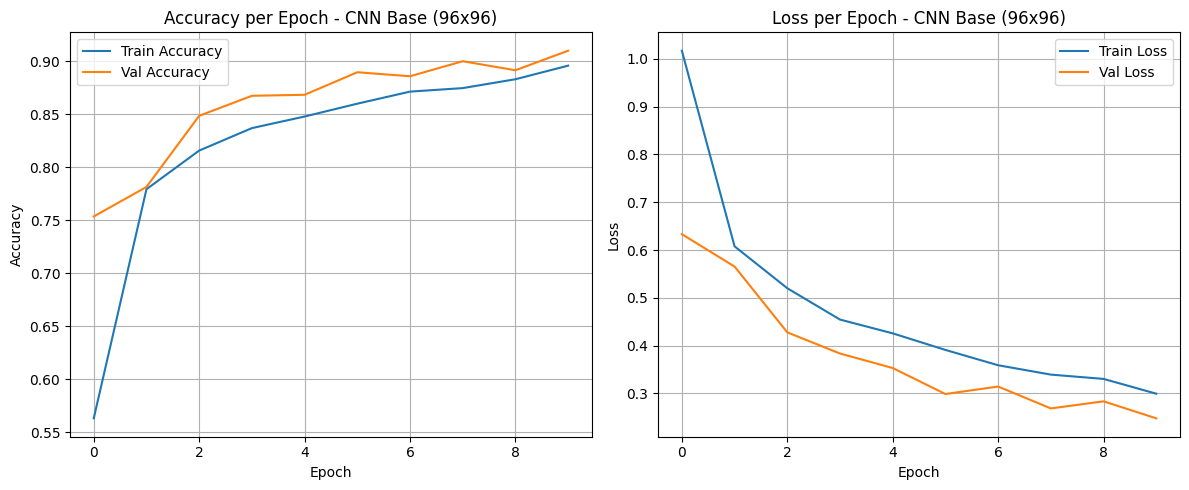

In [ ]:
# PLOT LOSS & ACCURACY
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy per Epoch - CNN Base (96x96)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss per Epoch - CNN Base (96x96)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# CLASSIFICATION REPORT
report = classification_report(
    y_true,
    y_pred,
    target_names=list(test_gen.class_indices.keys())
)

print("=== Classification Report - CNN Base (96x96) ===")
print(report)


=== Classification Report - CNN Base (96x96) ===
              precision    recall  f1-score   support

       apple       0.91      0.84      0.87       434
      banana       0.88      0.94      0.91       461
      grapes       0.86      0.86      0.86       434
      orange       0.97      0.91      0.94       394
  strawberry       0.92      0.98      0.95       406

    accuracy                           0.90      2129
   macro avg       0.91      0.90      0.90      2129
weighted avg       0.90      0.90      0.90      2129



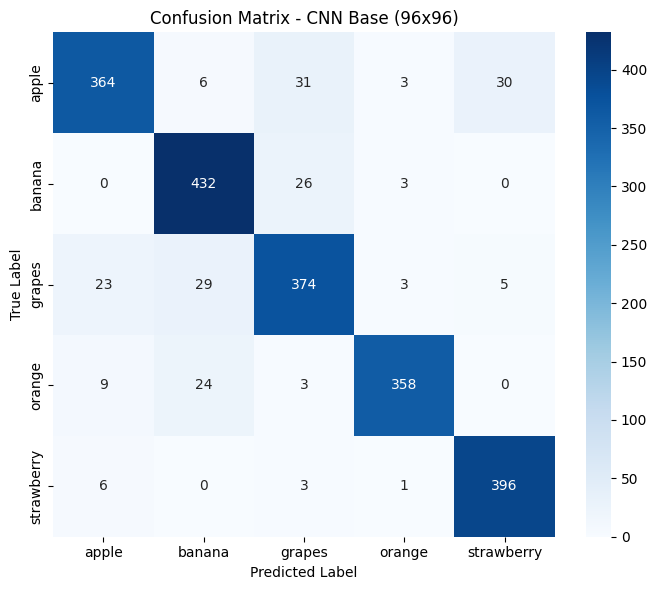

In [ ]:
# CONFUSION MATRIX
test_gen.reset()

y_pred_prob = cnn_model.predict(test_gen, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=test_gen.class_indices.keys(),
    yticklabels=test_gen.class_indices.keys()
)

plt.title("Confusion Matrix - CNN Base (96x96)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
